# Pre-process on the test dataset

In [1]:
# imports for the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Marketing_Campaign_Test.csv")  # Create a pandas object to read the data from the csv file

In [3]:
df.info()  # Get the type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     560 non-null    int64  
 1   Year_Birth             551 non-null    float64
 2   Education              556 non-null    object 
 3   Status                 543 non-null    object 
 4   Income                 543 non-null    float64
 5   Num_of_kids            556 non-null    float64
 6   Num_of_Teen            550 non-null    float64
 7   Registration_date      560 non-null    object 
 8   Recency                560 non-null    int64  
 9   Mnt_Fruits             558 non-null    float64
 10  Mnt_Meat               558 non-null    float64
 11  Mnt_sweet              552 non-null    float64
 12  Mnt_Wines              558 non-null    float64
 13  Mnt_Gold_Products      558 non-null    float64
 14  Mnt_Fish               558 non-null    float64
 15  Num_We

In [4]:
df_missing_values = df.isnull().sum(axis=0)>1
display(df_missing_values)

missing_values_cols = []

for col in df_missing_values.index:
    if df_missing_values[col] == True:
        missing_values_cols.append(col)

        
print(missing_values_cols)

ID                       False
Year_Birth                True
Education                 True
Status                    True
Income                    True
Num_of_kids               True
Num_of_Teen               True
Registration_date        False
Recency                  False
Mnt_Fruits                True
Mnt_Meat                  True
Mnt_sweet                 True
Mnt_Wines                 True
Mnt_Gold_Products         True
Mnt_Fish                  True
Num_Web_Purchases         True
Num_Store_Purchases       True
Num_Deals_Purchases       True
Num_Catalog_Purchases     True
Num_Web_Visits            True
Response_Campaign_1       True
Response_Campaign_2       True
Response_Campaign_3       True
Response_Campaign_4       True
Response_Campaign_5       True
Complain                  True
Cost_Contact              True
Revenue                   True
dtype: bool

['Year_Birth', 'Education', 'Status', 'Income', 'Num_of_kids', 'Num_of_Teen', 'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases', 'Num_Web_Visits', 'Response_Campaign_1', 'Response_Campaign_2', 'Response_Campaign_3', 'Response_Campaign_4', 'Response_Campaign_5', 'Complain', 'Cost_Contact', 'Revenue']


In [5]:
redundant_rows = df[df.isnull().sum(axis=1)>=6].index
print(redundant_rows,'\n')

df = df.drop(redundant_rows)  # update the dataframe
df.info()

Int64Index([42, 194, 355, 385, 552, 559], dtype='int64') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 558
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     554 non-null    int64  
 1   Year_Birth             549 non-null    float64
 2   Education              554 non-null    object 
 3   Status                 541 non-null    object 
 4   Income                 541 non-null    float64
 5   Num_of_kids            554 non-null    float64
 6   Num_of_Teen            548 non-null    float64
 7   Registration_date      554 non-null    object 
 8   Recency                554 non-null    int64  
 9   Mnt_Fruits             554 non-null    float64
 10  Mnt_Meat               554 non-null    float64
 11  Mnt_sweet              548 non-null    float64
 12  Mnt_Wines              554 non-null    float64
 13  Mnt_Gold_Products      554 non-null    float64
 14 

In [6]:
df_missing_values = df.isnull().sum(axis=0)>1
display(df_missing_values)

missing_values_cols = []

for col in df_missing_values.index:
    if df_missing_values[col] == True:
        missing_values_cols.append(col)

        
print(missing_values_cols)

ID                       False
Year_Birth                True
Education                False
Status                    True
Income                    True
Num_of_kids              False
Num_of_Teen               True
Registration_date        False
Recency                  False
Mnt_Fruits               False
Mnt_Meat                 False
Mnt_sweet                 True
Mnt_Wines                False
Mnt_Gold_Products        False
Mnt_Fish                 False
Num_Web_Purchases         True
Num_Store_Purchases      False
Num_Deals_Purchases      False
Num_Catalog_Purchases    False
Num_Web_Visits           False
Response_Campaign_1       True
Response_Campaign_2      False
Response_Campaign_3      False
Response_Campaign_4      False
Response_Campaign_5      False
Complain                 False
Cost_Contact             False
Revenue                  False
dtype: bool

['Year_Birth', 'Status', 'Income', 'Num_of_Teen', 'Mnt_sweet', 'Num_Web_Purchases', 'Response_Campaign_1']


In [7]:
for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')

Attribute  Year_Birth has  5  missing values
Attribute  Status has  13  missing values
Attribute  Income has  13  missing values
Attribute  Num_of_Teen has  6  missing values
Attribute  Mnt_sweet has  6  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values


In [8]:
df['Registration_date'] = pd.to_datetime(df['Registration_date']) 


In [9]:
df["Education"].replace(['Basic','2n Cycle','Graduation', 'Master', 'PhD'], [0, 1, 2, 3, 4], inplace=True)


## Missing values

In [10]:
sum1 = 0

for val in range(1,7,1):
    num = len(df[df.isnull().sum(axis=1)==val])
    print(num, 'rows has ', val,' missing values')
    sum1 += num * val
    
val = 7
num = len(df[df.isnull().sum(axis=1)>val])
print(num, 'rows has more than ', val,' missing values')

print(sum1)

60 rows has  1  missing values
3 rows has  2  missing values
0 rows has  3  missing values
0 rows has  4  missing values
0 rows has  5  missing values
0 rows has  6  missing values
0 rows has more than  7  missing values
66


In [11]:
for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')

Attribute  Year_Birth has  5  missing values
Attribute  Status has  13  missing values
Attribute  Income has  13  missing values
Attribute  Num_of_Teen has  6  missing values
Attribute  Mnt_sweet has  6  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values


In [12]:
df[df['Year_Birth'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
206,1377,NaN,3,Widow,44551.0,0.0,1.0,2013-08-31,24,182.0,...,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
252,7232,NaN,2,Widow,42429.0,0.0,1.0,2014-11-02,99,55.0,...,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
329,7094,NaN,2,Widow,58330.0,0.0,1.0,2013-12-25,87,445.0,...,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
375,313,NaN,2,Widow,73455.0,0.0,0.0,2013-10-28,98,901.0,...,10.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0
378,10972,NaN,2,Widow,72298.0,0.0,0.0,2014-10-03,52,625.0,...,6.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0


all of the ones with missing Year_Birth are widow

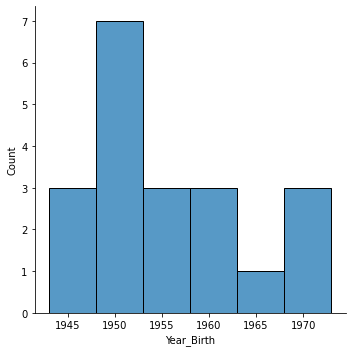

In [13]:
a = df[df["Status"]=="Widow"]
sns.displot(a["Year_Birth"])

C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/1946963785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Year_Birth"][row] = df["Year_Birth"][row] = np.random.randint(1945, 1970)


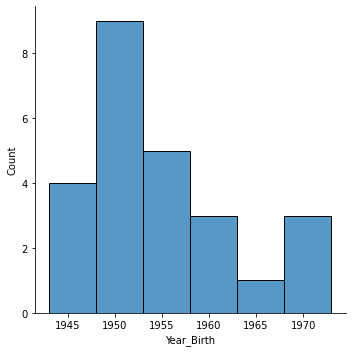

In [14]:
missing_value_1 = df["Year_Birth"][df["Year_Birth"].isnull()]
for row in missing_value_1.index:
    a["Year_Birth"][row] = df["Year_Birth"][row] = np.random.randint(1945, 1970)
sns.displot(a["Year_Birth"])

In [15]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  13  missing values
Attribute  Income has  13  missing values
Attribute  Num_of_Teen has  6  missing values
Attribute  Mnt_sweet has  6  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values
61


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 558
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     554 non-null    int64         
 1   Year_Birth             554 non-null    float64       
 2   Education              554 non-null    int64         
 3   Status                 541 non-null    object        
 4   Income                 541 non-null    float64       
 5   Num_of_kids            554 non-null    float64       
 6   Num_of_Teen            548 non-null    float64       
 7   Registration_date      554 non-null    datetime64[ns]
 8   Recency                554 non-null    int64         
 9   Mnt_Fruits             554 non-null    float64       
 10  Mnt_Meat               554 non-null    float64       
 11  Mnt_sweet              548 non-null    float64       
 12  Mnt_Wines              554 non-null    float64       
 13  Mnt_G

In [17]:
df["Status"].unique()

array(['Together', 'Married', nan, 'Single', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [18]:
df[df["Status"] == "Alone"]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
157,7660,1973.0,4,Alone,35860.0,1.0,1.0,2014-05-19,37,15.0,...,2.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0


we will change "Alone" to single 

In [19]:
df["Status"][df["Status"] == "Alone"] = "Single"

C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/561559530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status"][df["Status"] == "Alone"] = "Single"


In [20]:
df["Status"].unique()

array(['Together', 'Married', nan, 'Single', 'Divorced', 'Widow'],
      dtype=object)

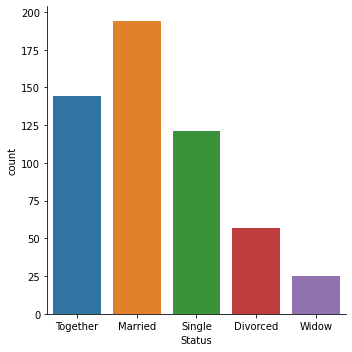

In [21]:
sns.catplot(x="Status", kind="count", data=df)

In [22]:
missing_value_status = df["Status"][df["Status"].isnull()]
if len(missing_value_status.index) !=0:
    for row in missing_value_status.index:
        df["Status"][row] = random.choice(df["Status"][df["Status"].isnull()==False].values)

else:
    print("no nan values")
print(df["Status"].unique())

['Together' 'Married' 'Single' 'Divorced' 'Widow']


C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/3312035300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status"][row] = random.choice(df["Status"][df["Status"].isnull()==False].values)


In [23]:
df["Status_cat"] = df["Status"].copy()
df["Status_cat"].replace(['Single','Together', 'Divorced', 'Widow', 'Married'], [1, 2, 3, 4, 5], inplace=True)
df["Status_cat"].unique()

array([2, 5, 1, 3, 4], dtype=int64)

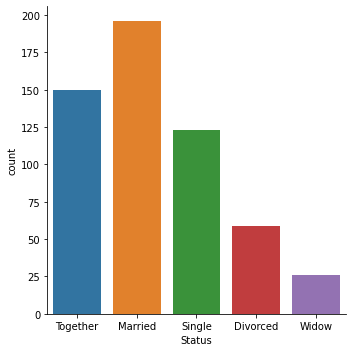

In [24]:
sns.catplot(x="Status", kind="count", data=df)

In [25]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  13  missing values
Attribute  Num_of_Teen has  6  missing values
Attribute  Mnt_sweet has  6  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values
48


In [26]:
df["Mnt_all"] = df["Mnt_sweet"] + df["Mnt_Fruits"] + df["Mnt_Gold_Products"] + df["Mnt_Wines"] + df["Mnt_Meat"] + df["Mnt_Fish"]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 558
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     554 non-null    int64         
 1   Year_Birth             554 non-null    float64       
 2   Education              554 non-null    int64         
 3   Status                 554 non-null    object        
 4   Income                 541 non-null    float64       
 5   Num_of_kids            554 non-null    float64       
 6   Num_of_Teen            548 non-null    float64       
 7   Registration_date      554 non-null    datetime64[ns]
 8   Recency                554 non-null    int64         
 9   Mnt_Fruits             554 non-null    float64       
 10  Mnt_Meat               554 non-null    float64       
 11  Mnt_sweet              548 non-null    float64       
 12  Mnt_Wines              554 non-null    float64       
 13  Mnt_G

In [28]:
missing_value_Income = df[df["Income"].isnull()]

for row in missing_value_Income.index:
    b = df["Mnt_all"][row]
    a = df[df["Mnt_all"] > b - 5]
    c = a[df["Mnt_all"] < b + 5]

    if c["Income"][c["Income"].isnull()==False].empty | c.empty:
        print("empty_on_first_one! ")
        a = df[df["Mnt_all"] > b -15]
        c = a[df["Mnt_all"] < b + 15]

    if c["Income"][c["Income"].isnull()==False].empty | c.empty:
        print("always empty!  ;)")
        c = df 
    df["Income"][row] = (c["Income"][c["Income"].isnull()==False]).mean()

empty_on_first_one! 
empty_on_first_one! 


C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/4212524986.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Mnt_all"] < b + 5]
C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/4212524986.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Income"][row] = (c["Income"][c["Income"].isnull()==False]).mean()
C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/4212524986.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Mnt_all"] < b + 15]


In [29]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  0  missing values
Attribute  Num_of_Teen has  6  missing values
Attribute  Mnt_sweet has  6  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values
35


In [30]:
missing_value_sweet = df[df["Mnt_sweet"].isnull()]

for row in missing_value_sweet.index:
    b = df["Num_Deals_Purchases"][row]
    a = df[df["Num_Deals_Purchases"] > b -1]
    c = a[df["Num_Deals_Purchases"] < b + 1]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Num_Deals_Purchases"] > b -2]
        c = a[df["Num_Deals_Purchases"] < b + 2]
    if c.empty:
        print("always empty! ;)")
        c = df        
    df["Mnt_sweet"][row] = (c["Mnt_sweet"][c["Mnt_sweet"].isnull()==False]).mean()

C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/516328937.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Num_Deals_Purchases"] < b + 1]
C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/516328937.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mnt_sweet"][row] = (c["Mnt_sweet"][c["Mnt_sweet"].isnull()==False]).mean()


In [31]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  0  missing values
Attribute  Num_of_Teen has  6  missing values
Attribute  Mnt_sweet has  0  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values
29


In [32]:
missing_value_sweet = df[df["Num_of_Teen"].isnull()]

for row in missing_value_sweet.index:
    b = df["Num_Web_Purchases"][row]
    a = df[df["Num_Web_Purchases"] > b -1]
    c = a[df["Num_Web_Purchases"] < b + 1]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Num_Web_Purchases"] > b -2]
        c = a[df["Num_Web_Purchases"] < b + 2]
    if c.empty:
        print("always empty! ;)")
        c = df        
    df["Num_of_Teen"][row] = int((c["Num_of_Teen"][c["Num_of_Teen"].isnull()==False]).mean())

C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/3647383370.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Num_Web_Purchases"] < b + 1]
C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/3647383370.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_of_Teen"][row] = int((c["Num_of_Teen"][c["Num_of_Teen"].isnull()==False]).mean())


In [33]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  0  missing values
Attribute  Num_of_Teen has  0  missing values
Attribute  Mnt_sweet has  0  missing values
Attribute  Num_Web_Purchases has  13  missing values
Attribute  Response_Campaign_1 has  10  missing values
23


In [34]:
missing_value_sweet = df[df["Num_Web_Purchases"].isnull()]

for row in missing_value_sweet.index:
    b = df["Num_of_Teen"][row]
    a = df[df["Num_of_Teen"] > b - 1]
    c = a[df["Num_of_Teen"] < b + 1]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Num_of_Teen"] > b - 2]
        c = a[df["Num_of_Teen"] < b + 2]

    if c.empty:
        print("always empty! ;)")
        c = df        
    df["Num_Web_Purchases"][row] = int((c["Num_Web_Purchases"][c["Num_Web_Purchases"].isnull()==False]).mean())

C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/1137775252.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Web_Purchases"][row] = int((c["Num_Web_Purchases"][c["Num_Web_Purchases"].isnull()==False]).mean())
C:\Users\Tomer\AppData\Local\Temp/ipykernel_18716/1137775252.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Num_of_Teen"] < b + 1]


In [35]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  0  missing values
Attribute  Num_of_Teen has  0  missing values
Attribute  Mnt_sweet has  0  missing values
Attribute  Num_Web_Purchases has  0  missing values
Attribute  Response_Campaign_1 has  10  missing values
10


In [36]:
df["Response_Campaign_1"] = df["Response_Campaign_1"].fillna(0)


In [37]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  0  missing values
Attribute  Num_of_Teen has  0  missing values
Attribute  Mnt_sweet has  0  missing values
Attribute  Num_Web_Purchases has  0  missing values
Attribute  Response_Campaign_1 has  0  missing values
0


In [38]:
df["Mnt_all"] = df["Mnt_sweet"] + df["Mnt_Fruits"] + df["Mnt_Gold_Products"] + df["Mnt_Wines"] + df["Mnt_Meat"] + df["Mnt_Fish"]
df["Status_cat"] = df["Status"].copy()
df["Status_cat"].replace(['Single','Together', 'Divorced', 'Widow', 'Married'], [1, 2, 3, 4, 5], inplace=True)

In [39]:
df = df.drop(["Cost_Contact", "Revenue"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 558
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     554 non-null    int64         
 1   Year_Birth             554 non-null    float64       
 2   Education              554 non-null    int64         
 3   Status                 554 non-null    object        
 4   Income                 554 non-null    float64       
 5   Num_of_kids            554 non-null    float64       
 6   Num_of_Teen            554 non-null    float64       
 7   Registration_date      554 non-null    datetime64[ns]
 8   Recency                554 non-null    int64         
 9   Mnt_Fruits             554 non-null    float64       
 10  Mnt_Meat               554 non-null    float64       
 11  Mnt_sweet              554 non-null    float64       
 12  Mnt_Wines              554 non-null    float64       
 13  Mnt_G

In [40]:
for col in df.columns:
    print(col, len(df[col].unique()))

ID 554
Year_Birth 55
Education 5
Status 5
Income 536
Num_of_kids 3
Num_of_Teen 3
Registration_date 374
Recency 100
Mnt_Fruits 338
Mnt_Meat 118
Mnt_sweet 267
Mnt_Wines 127
Mnt_Gold_Products 116
Mnt_Fish 138
Num_Web_Purchases 11
Num_Store_Purchases 12
Num_Deals_Purchases 12
Num_Catalog_Purchases 14
Num_Web_Visits 13
Response_Campaign_1 2
Response_Campaign_2 2
Response_Campaign_3 2
Response_Campaign_4 2
Response_Campaign_5 2
Complain 2
Status_cat 5
Mnt_all 416


In [41]:
numeric_col = df.describe(datetime_is_numeric=True).columns
numeric_col.__len__()


27

In [42]:
numeric_data = df[numeric_col]
scaler = MinMaxScaler()
    
for i in numeric_data:
    if i !='ID':
        scaler.fit(pd.DataFrame(df[i]))
        df[i] = scaler.transform(pd.DataFrame(df[i]))
df.describe()

,ID,Year_Birth,Education,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Status_cat,Mnt_all
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5604.407942,0.710308,0.614621,0.317554,0.206679,0.256318,0.514782,0.503318,0.207487,0.148586,...,0.456679,0.357401,0.063177,0.083032,0.072202,0.063177,0.012635,0.010830,0.509928,0.251481
std,3286.942917,0.126898,0.244178,0.136184,0.269234,0.272630,0.217456,0.288414,0.220360,0.214771,...,0.254575,0.171273,0.243501,0.276181,0.259056,0.243501,0.111796,0.103597,0.404977,0.243700
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2745.750000,0.614583,0.500000,0.210285,0.000000,0.000000,0.345104,0.262626,0.019323,0.010050,...,0.230769,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.028862
50%,5365.000000,0.729167,0.500000,0.319676,0.000000,0.000000,0.509416,0.494949,0.135431,0.050251,...,0.384615,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.178102
75%,8543.000000,0.802083,0.750000,0.426177,0.500000,0.500000,0.677495,0.747475,0.336183,0.185930,...,0.615385,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.432313
max,11188.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df.to_csv('market_test_new_13_5.csv')